### IMPORTANDO BIBLIOTECAS

In [47]:
#Bibliotecas necessárias
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import csv
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import unidecode
import unicodedata
from pandas_profiling import ProfileReport
from IPython.display import display, HTML
from IPython.display import display
from matplotlib.pyplot import figure
import string
import altair as alt

In [48]:
#Importando bases de dados
linha = pd.read_csv('C:/Users/Ricardo/cimatec/tcc/final/linha_ressonancia.csv')

In [49]:
#Observando dataframe
linha[1:]

,Unnamed: 0,registro_paciente,codigo_servico,descricao_servico,data_da_os,texto_do_laudo
1,56504,56504,rmmambil,RM MAMA ...,2016-10-05,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...
2,56505,56505,rmmambil,RM MAMA ...,2016-11-10,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...
3,56506,56506,rmmambil,RM MAMA ...,2016-06-21,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clíni...
4,56507,56507,rmmambil,RM MAMA ...,2016-10-13,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...
5,56508,56508,rmmambil,RM MAMA ...,2016-12-15,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clínic...
...,...,...,...,...,...,...
8808,65469,65469,rmmambil,RM MAMA ...,2021-12-20,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação cl...
8809,65470,65470,rmmambil,RM MAMA ...,2021-12-20,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação cl...
8810,65471,65471,rmmambil,RM MAMA ...,2021-12-17,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação cl...
8811,65472,65472,rmmambil,RM MAMA ...,2021-12-27,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...


In [50]:
#Excluindo coluna 
linha = linha.drop('Unnamed: 0', 1)

C:\Users\Ricardo\AppData\Local\Temp/ipykernel_83428/191732388.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  linha = linha.drop('Unnamed: 0', 1)


In [51]:
#Observando dataframe
linha.head()

,registro_paciente,codigo_servico,descricao_servico,data_da_os,texto_do_laudo
0,56503,rmmambil,RM MAMA ...,2016-12-16,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...
1,56504,rmmambil,RM MAMA ...,2016-10-05,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...
2,56505,rmmambil,RM MAMA ...,2016-11-10,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...
3,56506,rmmambil,RM MAMA ...,2016-06-21,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clíni...
4,56507,rmmambil,RM MAMA ...,2016-10-13,RESSONÂNCIA MAGNÉTICA MAMÁRIA Indicação clín...


### VERIFICANDO TIPOS DE DADOS E VALORES FALTANTES

In [52]:
#Dados sobre o dataframe
linha.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8813 entries, 0 to 8812
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   registro_paciente  8813 non-null   int64 
 1   codigo_servico     8813 non-null   object
 2   descricao_servico  8813 non-null   object
 3   data_da_os         8813 non-null   object
 4   texto_do_laudo     8813 non-null   object
dtypes: int64(1), object(4)
memory usage: 344.4+ KB


C:\Users\Ricardo\AppData\Local\Temp/ipykernel_83428/1830142643.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  linha.info(verbose=True, null_counts=True)


### TRATANDO COLUNAS ESPECIFICAS EM RELAÇÃO A TIPO DE DADO E APRESENTAÇÕES QUANTO AO ARMAZENAMENTO

In [53]:
#importando bibliotecas
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np
import string

In [54]:
#Transformando todas as palavras em lowercase para a variavel texto_do_laudo para dataframe final
linha['texto_do_laudo'] = linha['texto_do_laudo'].str.lower()

#Excluindo acentuação para coluna texto_do_laudo
linha['texto_do_laudo'] = linha['texto_do_laudo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [55]:
#Eliminando quebras de linhas para coluna texto_do_laudo
# \'s  \r  \n 
linha['texto_do_laudo'] = linha['texto_do_laudo'].str.replace("\r", " ")
linha['texto_do_laudo'] = linha['texto_do_laudo'].str.replace("\'s", "")
linha['texto_do_laudo'] = linha['texto_do_laudo'].str.replace("\n", " ")
linha['texto_do_laudo'] = linha['texto_do_laudo'].str.replace("    ", " ")

In [56]:
#Aplicando na base remoção de pontuação
linha['texto_do_laudo'] = [content.translate(str.maketrans('','', string.punctuation)) for content in linha['texto_do_laudo']]

In [57]:
#Remover espaços excessivos entre palavras para coluna texto_do_laudo
linha.texto_do_laudo = linha.texto_do_laudo.replace('\s+', ' ', regex=True)

In [58]:
#Baixando as listas de stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ricardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
#Carregando a lista de stopwords em portugues
stop_words = list(stopwords.words('portuguese'))
stop_words[0:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [60]:
#Aplicando na base

linha['texto_do_laudo_2'] = linha['texto_do_laudo']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    linha['texto_do_laudo_2'] = linha['texto_do_laudo_2'].str.replace(regex_stopword, '')

C:\Users\Ricardo\AppData\Local\Temp/ipykernel_83428/902855763.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  linha['texto_do_laudo_2'] = linha['texto_do_laudo_2'].str.replace(regex_stopword, '')


In [61]:
#Verificando o antes e o depois
print('Antes: \n'+ linha.loc[1000]['texto_do_laudo'] + '\n \n')

print('Depois: \n'+ linha.loc[1000]['texto_do_laudo_2'])

Antes: 
 ressonancia magnetica mamaria indicacao clinica a paciente realiza o presente estudo para esclarecimento diagnostico dados clinicos e exames anteriores mamografia de 170516 do nosso servico revela microcalcificacoes amorfas em quadrante superolateral qsl da mama esquerda a core biopsy de 150716 teve resultado histopatologico de fibrose estromal com calcificacoes aspectos tecnicos estudo realizado atraves de tecnicas fast spin echo short time inversion recovery stir echo planar imaging epi e 3dgradient echo vibrant com imagens obtidas nos planos sagital e axial ponderadas em t1 e t2 com supressao de gordura alem de sequencia axial com tecnica de difusao apos a infusao venosa do meio de contraste paramagnetico em bolo 150 ml foi realizado estudo dinamico em cinco fases sendo a primeira concluida antes de dois minutos com sequencias sagitais ponderadas em t1 com supressao de gordura tecnica vibrant o posprocessamento do exame foi efetuado em workstation ge com estudo cinetico das

In [62]:
#Removendo numeros
linha['texto_do_laudo_3'] = [content.translate(str.maketrans('','', string.digits)) for content in linha['texto_do_laudo_2']]

In [63]:
#Verificando o antes e o depois
print('Antes: \n'+ linha.loc[1000]['texto_do_laudo'] + '\n \n')

print('Depois: \n'+ linha.loc[1000]['texto_do_laudo_3'])

Antes: 
 ressonancia magnetica mamaria indicacao clinica a paciente realiza o presente estudo para esclarecimento diagnostico dados clinicos e exames anteriores mamografia de 170516 do nosso servico revela microcalcificacoes amorfas em quadrante superolateral qsl da mama esquerda a core biopsy de 150716 teve resultado histopatologico de fibrose estromal com calcificacoes aspectos tecnicos estudo realizado atraves de tecnicas fast spin echo short time inversion recovery stir echo planar imaging epi e 3dgradient echo vibrant com imagens obtidas nos planos sagital e axial ponderadas em t1 e t2 com supressao de gordura alem de sequencia axial com tecnica de difusao apos a infusao venosa do meio de contraste paramagnetico em bolo 150 ml foi realizado estudo dinamico em cinco fases sendo a primeira concluida antes de dois minutos com sequencias sagitais ponderadas em t1 com supressao de gordura tecnica vibrant o posprocessamento do exame foi efetuado em workstation ge com estudo cinetico das

In [64]:
#Verificando variáveis
linha.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8813 entries, 0 to 8812
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   registro_paciente  8813 non-null   int64 
 1   codigo_servico     8813 non-null   object
 2   descricao_servico  8813 non-null   object
 3   data_da_os         8813 non-null   object
 4   texto_do_laudo     8813 non-null   object
 5   texto_do_laudo_2   8813 non-null   object
 6   texto_do_laudo_3   8813 non-null   object
dtypes: int64(1), object(6)
memory usage: 482.1+ KB


C:\Users\Ricardo\AppData\Local\Temp/ipykernel_83428/2444266454.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  linha.info(verbose=True, null_counts=True)


In [65]:
#Observando se ainda há valores nulos
linha.isnull().values.any()

False

In [66]:
#Dimensoes do dataframe
print('Quantidade de registros e atributos:', linha.shape)

Quantidade de registros e atributos: (8813, 7)


In [67]:
#Observando dados estatisticos
linha.describe()

,registro_paciente
count,8813.000000
mean,61009.761148
std,2592.516945
min,56503.000000
25%,58753.000000
50%,61030.000000
75%,63255.000000
max,65473.000000


In [68]:
#Renomeando dataframe
ressonancia = linha

In [69]:
#Datas inicial e final dara a variavel data_da_os
print ("Data da primeira OS:", min(ressonancia['data_da_os']))
print ("Data da última OS:", max(ressonancia['data_da_os']))

Data da primeira OS: 2016-01-04
Data da última OS: 2021-12-30


In [70]:
#Criando novo dataframe
ressonancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8813 entries, 0 to 8812
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   registro_paciente  8813 non-null   int64 
 1   codigo_servico     8813 non-null   object
 2   descricao_servico  8813 non-null   object
 3   data_da_os         8813 non-null   object
 4   texto_do_laudo     8813 non-null   object
 5   texto_do_laudo_2   8813 non-null   object
 6   texto_do_laudo_3   8813 non-null   object
dtypes: int64(1), object(6)
memory usage: 482.1+ KB


In [71]:
#Estatisticas sobre o dataframe criado
ressonancia.describe()

,registro_paciente
count,8813.000000
mean,61009.761148
std,2592.516945
min,56503.000000
25%,58753.000000
50%,61030.000000
75%,63255.000000
max,65473.000000


### OBSERVANDO DADOS

<AxesSubplot:>

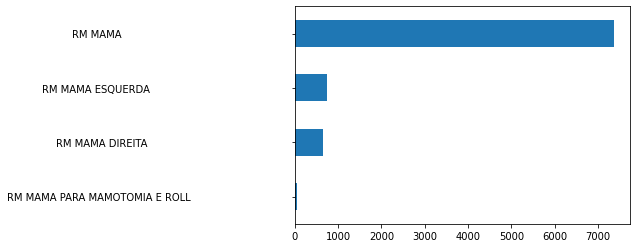

In [115]:
#Contando linhas para variavel codigo_do_servico
ressonancia.descricao_servico.value_counts().sort_values().plot(kind = 'barh')

In [116]:
#Contando linhas para variavel codigo_do_servico
item_counts = ressonancia[["codigo_servico","descricao_servico"]].value_counts()
print('Qtde. laudos por Serviço:')
item_counts.to_frame()

Qtde. laudos por Serviço:


,,0
codigo_servico,descricao_servico,
rmmambil,RM MAMA,7360
rmmamae,RM MAMA ESQUERDA,750
rmmama,RM MAMA DIREITA,657
mamabase,RM MAMA PARA MAMOTOMIA E ROLL,46


In [117]:
#Contando linhas para variavel codigo_do_servico no dataframe mamotomia
item_counts = ressonancia[["codigo_servico","descricao_servico"]].value_counts(normalize=True).round(4)
print('Qtde. laudos por Serviço:')
(item_counts*100).to_frame()

Qtde. laudos por Serviço:


,,0
codigo_servico,descricao_servico,
rmmambil,RM MAMA,83.51
rmmamae,RM MAMA ESQUERDA,8.51
rmmama,RM MAMA DIREITA,7.45
mamabase,RM MAMA PARA MAMOTOMIA E ROLL,0.52


### CRIANDO VARIAVEL AUXILIAR PARA VERIFICAÇÃO DE BI-RADS

In [118]:
#Criando variavel
ressonancia['birads'] = 'sem categoria'

In [119]:
#Verificando dataframe
ressonancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8813 entries, 0 to 8812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   registro_paciente  8813 non-null   int64 
 1   codigo_servico     8813 non-null   object
 2   descricao_servico  8813 non-null   object
 3   data_da_os         8813 non-null   object
 4   texto_do_laudo     8813 non-null   object
 5   texto_do_laudo_2   8813 non-null   object
 6   texto_do_laudo_3   8813 non-null   object
 7   birads             8813 non-null   object
dtypes: int64(1), object(7)
memory usage: 550.9+ KB


In [120]:
#Associando valores para variavel birads atraves da localização de palavra-chave
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 0'), 'birads'] = 'categoria 0'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 1'), 'birads'] = 'categoria 1'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 2'), 'birads'] = 'categoria 2'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 3'), 'birads'] = 'categoria 3'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4'), 'birads'] = 'categoria 4'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4a'), 'birads'] = 'categoria 4a'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4 a'), 'birads'] = 'categoria 4a'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4b'), 'birads'] = 'categoria 4b'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4 b'), 'birads'] = 'categoria 4b'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4c'), 'birads'] = 'categoria 4c'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 4 c'), 'birads'] = 'categoria 4c'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 5'), 'birads'] = 'categoria 5'
ressonancia.loc[ressonancia['texto_do_laudo'].str.contains('rm 6'), 'birads'] = 'categoria 6'

In [121]:
#Verificando dataframe
ressonancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8813 entries, 0 to 8812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   registro_paciente  8813 non-null   int64 
 1   codigo_servico     8813 non-null   object
 2   descricao_servico  8813 non-null   object
 3   data_da_os         8813 non-null   object
 4   texto_do_laudo     8813 non-null   object
 5   texto_do_laudo_2   8813 non-null   object
 6   texto_do_laudo_3   8813 non-null   object
 7   birads             8813 non-null   object
dtypes: int64(1), object(7)
memory usage: 550.9+ KB


In [122]:
#Contando ocorrencias para variavel birads
ressonancia.groupby(['birads']).size()

birads
categoria 0        10
categoria 1       586
categoria 2      3387
categoria 3      1115
categoria 4       971
categoria 4a      280
categoria 4c        9
categoria 5       352
categoria 6       723
sem categoria    1380
dtype: int64

### OBSERVANDO DADOS

<AxesSubplot:>

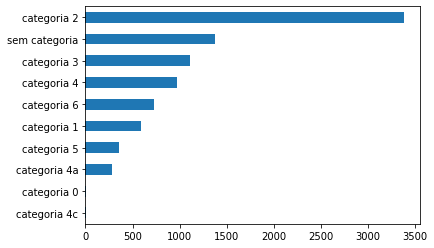

In [125]:
#Contando linhas para variavel birads
ressonancia.birads.value_counts().sort_values().plot(kind = 'barh')

In [126]:
#Contando linhas para variavel birads
item_counts = ressonancia[["birads"]].value_counts()
print('Qtde. de Registros por BiRads:')
item_counts.to_frame()

Qtde. de Registros por BiRads:


,0
birads,
categoria 2,3387
sem categoria,1380
categoria 3,1115
categoria 4,971
categoria 6,723
categoria 1,586
categoria 5,352
categoria 4a,280
categoria 0,10


In [127]:
#Percentual linhas para variavel birads
item_counts = ressonancia[["birads"]].value_counts(normalize=True)
print('Percentual de Laudos por BiRads:')
(item_counts*100).to_frame()

Percentual de Laudos por BiRads:


,0
birads,
categoria 2,38.431862
sem categoria,15.658686
categoria 3,12.651764
categoria 4,11.017815
categoria 6,8.203790
categoria 1,6.649268
categoria 5,3.994100
categoria 4a,3.177125
categoria 0,0.113469


### PREPARANDO DATAFRAME PARA ALGORITMOS DE ARVORES DE DECISAO (ORIGINAL)

In [92]:
#Criando dataframe com somente texto do laudo e classificação birads
texto_birads = ressonancia[['texto_do_laudo_3', 'birads']]

In [93]:
#Observando instâncias
texto_birads[:1]

,texto_do_laudo_3,birads
0,ressonancia magnetica mamaria indicacao clini...,categoria 2


In [94]:
#Contando valores
texto_birads.birads.value_counts()

categoria 2      3387
sem categoria    1380
categoria 3      1115
categoria 4       971
categoria 6       723
categoria 1       586
categoria 5       352
categoria 4a      280
categoria 0        10
categoria 4c        9
Name: birads, dtype: int64

In [95]:
#Criando variavel para mapeamento de categorias
category_codes = {
    'sem categoria': 999,
    'categoria 0': 0,
    'categoria 1': 1,
    'categoria 2': 2,
    'categoria 3': 3,
    'categoria 4': 4,
    'categoria 4a': 41,
    'categoria 4b': 42,
    'categoria 4c': 43,
    'categoria 5': 5,
    'categoria 6': 6
}

In [96]:
#Mapeamento das categorias
texto_birads['Category_Code'] = texto_birads['birads']
texto_birads = texto_birads.replace({'Category_Code':category_codes})

C:\Users\Ricardo\AppData\Local\Temp/ipykernel_83428/3002229940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texto_birads['Category_Code'] = texto_birads['birads']


In [97]:
#Eliminando categoria
texto_birads = texto_birads[(texto_birads.birads != 'sem categoria')]

In [98]:
#Contando valores
texto_birads.Category_Code.value_counts()

2     3387
3     1115
4      971
6      723
1      586
5      352
41     280
0       10
43       9
Name: Category_Code, dtype: int64

In [99]:
#Verificando dataframe
texto_birads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7433 entries, 0 to 8812
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   texto_do_laudo_3  7433 non-null   object
 1   birads            7433 non-null   object
 2   Category_Code     7433 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 232.3+ KB


In [100]:
#Exportando dataframe sem balanceamento
texto_birads.to_csv('C:/Users/Ricardo/cimatec/tcc/final/texto_birads_nao_balanceado.csv')

In [101]:
#Verificando dataframe exportado
texto_birads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7433 entries, 0 to 8812
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   texto_do_laudo_3  7433 non-null   object
 1   birads            7433 non-null   object
 2   Category_Code     7433 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 232.3+ KB


### OBSERVANDO DISTRIBUIÇÃO POR CLASSES

In [102]:
#Verificando percentuais de laudos por classes
df2 = pd.DataFrame(texto_birads.groupby('birads').count()['texto_do_laudo_3']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('birads'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% de Laudos')),
    color='birads'
).transform_window(
    TotalArticles='sum(texto_do_laudo_3)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.texto_do_laudo_3 / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Percentual original de laudos para cada classe",
)

alt.LayerChart(...)